## NLP Case Study 1:  Indeed.com

Using our Indeed scraper, we collected job titles, summaries, and locations using the terms "data analyst" and "data engineer".  We will eventually add on to this idea in future flex talks.  Primarily, we will explore some of the basics including:

- Count vectorizer
- Tfidf Vectorizer
- Ngrams
- Stopword removal
- Classification techniques

The CSV provided should have a sample of jobs scraped.  Once we have established a process to clean our data properly, we will grab more data and use it for training purposes.

In [11]:
%matplotlib inline

import pandas as pd, matplotlib, seaborn as sns, collections
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter

from nltk.util import ngrams

In [12]:
df = pd.read_csv("indeed.csv")

In [13]:
df['search_term'].value_counts()

Data Engineer    1496
Data Analyst     1486
search_term         1
dtype: int64

In [14]:
df.head(10)

,reviews,search_term,title,location,summary
0,NaN,Data Engineer,Data Engineer,"San Francisco, CA","and grow your career. Autonomy, flexibility an..."
1,6 reviews,Data Engineer,Database Engineer,"San Mateo, CA",Data Warehousing exposure. Experience optimizi...
2,2 reviews,Data Engineer,Big Data Software Engineer - Hedge Funds,"San Francisco Bay Area, CA",Big Data Software Engineer - Hedge Funds - tra...
3,NaN,Data Engineer,Data Engineer,NaN,\nWe are looking for a Data Engineer with the ...
4,2 reviews,Data Engineer,Senior Data Engineer,NaN,"\nAs a Senior Data Engineer, you’ll work on ex..."
5,NaN,Data Engineer,Data Engineer,NaN,"\nAs a Data Engineer, you will help tackle the..."
6,NaN,Data Engineer,Data Engineer,NaN,"\nand grow your career. Autonomy, flexibility ..."
7,264 reviews,Data Engineer,Full Stack Software Engineer Job,NaN,\nData access optimization:. Full Stack Softwa...
8,NaN,Data Engineer,Data Engineer,NaN,"\nAs a data engineer, you'll be working to imp..."
9,NaN,Data Engineer,Data Engineer,NaN,"\nAs our first data engineer in SF, you’ll wor..."


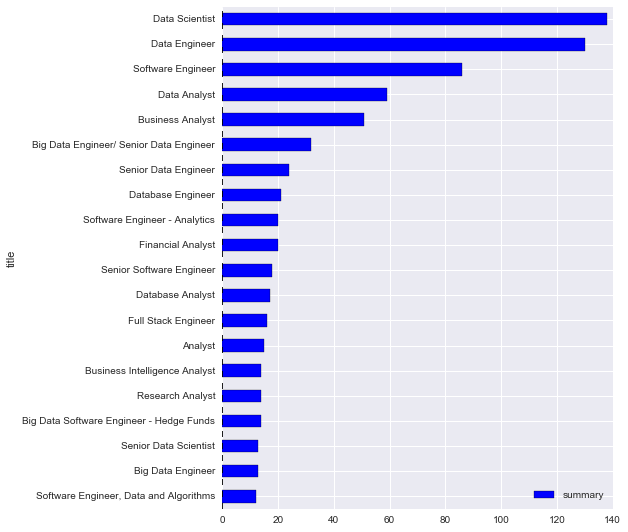

In [15]:
df[['title', 'summary']].groupby('title').count().sort('summary').tail(20).plot(kind='barh', figsize=(7,9))

In [16]:
summaries = ""
for summary in df.summary:
    summaries += summary
    
len(summaries), summaries[0:500]

(444667,
 'and grow your career. Autonomy, flexibility and a flat corporate structure. Plum is leading the transformation of commercial real estate lending throughData Warehousing exposure. Experience optimizing data models and database schemas, and SQL for distributed applications....Big Data Software Engineer - Hedge Funds - trading, portfolio management and analytics platform. We are seeking talented senior level software engineers to join...\nWe are looking for a Data Engineer with the Software Engineer')

In [17]:
words = summaries.split()
ngrams = ngrams(words, 3)

In [18]:
counts = collections.Counter(words)
counts.most_common(40)

[('and', 3440),
 ('data', 3198),
 ('to', 1699),
 ('of', 1406),
 ('a', 1242),
 ('the', 1190),
 ('Data', 1015),
 ('with', 978),
 ('for', 958),
 ('in', 879),
 ('is', 613),
 ('will', 459),
 ('our', 393),
 ('Analyst', 386),
 ('Engineer', 365),
 ('are', 338),
 ('team', 335),
 ('looking', 324),
 ('on', 312),
 ('an', 294),
 ('The', 288),
 ('experience', 270),
 ('engineers', 261),
 ('as', 260),
 ('or', 257),
 ('be', 247),
 ('Experience', 238),
 ('We', 236),
 ('Software', 222),
 ('from', 219),
 ('that', 214),
 ('analysis', 200),
 ('you', 194),
 ('work', 191),
 ('-', 177),
 ('business', 170),
 ('data.', 170),
 ('who', 170),
 ('years', 166),
 ('software', 163)]